## Sentiment Analysis on Product Reviews
## Mahnaz Mohammadzamani
## LIU ID: mahmo599

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "D:/Text mining/Project/amazon_reviews.csv" 
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


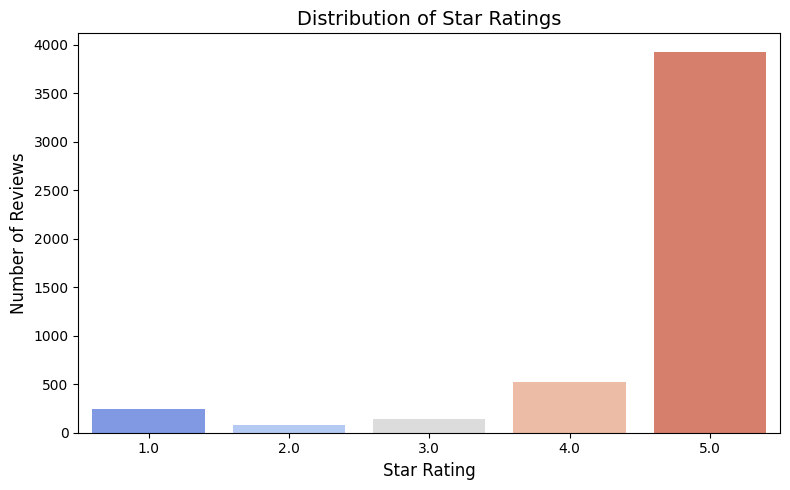

In [3]:
# Count values
rating_counts = df["overall"].value_counts().sort_index()

# Bar plot using the frequency data
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
# labels and title
plt.title("Distribution of Star Ratings", fontsize=14)
plt.xlabel("Star Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
import re
import string
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(f"[{string.punctuation}]", "", text)

    doc = nlp(text)
    # Lemmatize and remove stopwords and non-alphabetic tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

df["cleaned_review"] = df["reviewText"].apply(preprocess_text)

# Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_review"])
# Convert ratings to binary sentiment (Positive = 1, Negative = 0)
y = df["overall"].apply(lambda x: 1 if x > 3 else 0)  

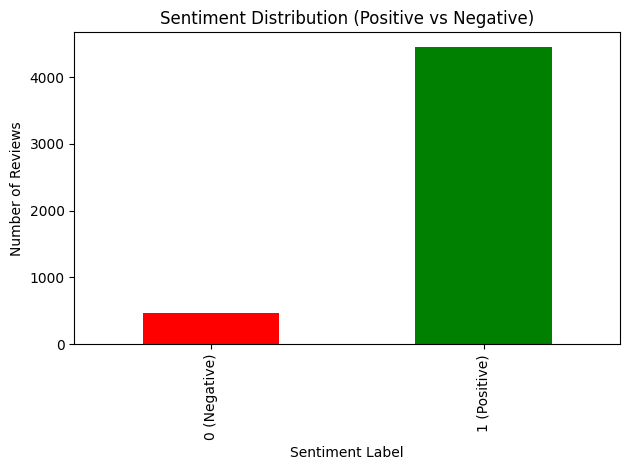

In [6]:
# Count values and plot
colors = ['red', 'green']
y.value_counts().sort_index().plot(kind='bar', color=colors)
plt.xticks([0, 1], ['0 (Negative)', '1 (Positive)'])
plt.title('Sentiment Distribution (Positive vs Negative)')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment Label')
plt.tight_layout()
plt.savefig("barplot.jpg")
plt.show()

## Logistic Regression, Naïve Bayes, SVM

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models (Logistic Regression,Naïve Bayes and SVM)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear")
}

# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #Print the performance of each model
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67        95
           1       0.98      0.93      0.95       888

    accuracy                           0.92       983
   macro avg       0.77      0.89      0.81       983
weighted avg       0.94      0.92      0.93       983


Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58        95
           1       0.94      0.99      0.97       888

    accuracy                           0.94       983
   macro avg       0.88      0.72      0.77       983
weighted avg       0.93      0.94      0.93       983



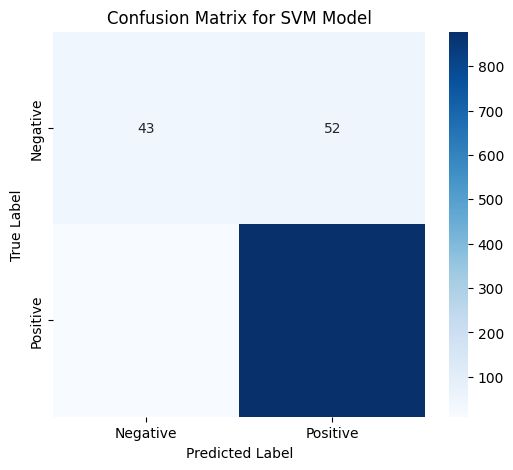

In [8]:
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix for SVM Model(best model)
cm_svm = confusion_matrix(y_test, y_pred)  

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.savefig("confusion.jpg")
plt.show()


In [9]:
#fit a random baseline 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
print(dummy_clf.score(y_test, y_pred))
y_pred=dummy_clf.predict(X_test)
performance=classification_report(y_test, y_pred)
print(performance)

0.8677517802644964
              precision    recall  f1-score   support

           0       0.10      0.12      0.11        95
           1       0.90      0.89      0.90       888

    accuracy                           0.81       983
   macro avg       0.50      0.50      0.50       983
weighted avg       0.83      0.81      0.82       983



In [10]:
#fit the most-frequent-class baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
print(dummy_clf.score(y_test, y_pred))
y_pred=dummy_clf.predict(X_test)
performance=classification_report(y_test, y_pred)
print(performance)

0.8880976602238047
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
#Determining the minimum number of samples for each party
parties = sorted(y_train.unique())
y_count=y_train.value_counts()
min_y=min(y_count)
sample=[]

# Loop through each unique class
for y in parties:
    # Find all indices for the current class
    y_id = np.where(y_train == y)[0]
    selected_id = np.random.choice(y_id, min_y, replace=False)
    sample.extend(selected_id)

# Shuffle the indices to ensure random distribution
np.random.shuffle(sample)
# Creating the undersampled dataset
undersampled_x_train = X_train[sample]
undersampled_y_train = y_train.iloc[sample]
# Check the balance of the undersampled dataset
print(undersampled_y_train.value_counts())
# Extract features and labels for the undersampled data
X_resampled = undersampled_x_train
y_resampled = undersampled_y_train

0    371
1    371
Name: overall, dtype: int64


In [12]:
# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    #Print the performance of each model
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.43      0.87      0.57        95
           1       0.98      0.88      0.93       888

    accuracy                           0.87       983
   macro avg       0.71      0.87      0.75       983
weighted avg       0.93      0.87      0.89       983


Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.31      0.95      0.47        95
           1       0.99      0.78      0.87       888

    accuracy                           0.79       983
   macro avg       0.65      0.86      0.67       983
weighted avg       0.93      0.79      0.83       983


SVM Performance:
              precision    recall  f1-score   support

           0       0.40      0.89      0.55        95
           1       0.99      0.85      0.92       888

    accuracy                           0.86       983
   macro avg       0.69      0.87      0.73       

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Define models (Logistic Regression,Naïve Bayes and SVM)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(kernel="linear",class_weight='balanced')
}

# Train and Evaluate Models
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    #Print the performance of each model
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.61      0.78      0.69        95
           1       0.98      0.95      0.96       888

    accuracy                           0.93       983
   macro avg       0.79      0.86      0.82       983
weighted avg       0.94      0.93      0.93       983


Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.44      0.84      0.58        95
           1       0.98      0.89      0.93       888

    accuracy                           0.88       983
   macro avg       0.71      0.86      0.76       983
weighted avg       0.93      0.88      0.90       983


SVM Performance:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66        95
           1       0.97      0.95      0.96       888

    accuracy                           0.93       983
   macro avg       0.79      0.84      0.81       

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X = df["cleaned_review"].astype(str)
y = df["overall"].apply(lambda x: 1 if x > 3 else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipe = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("logreg", LogisticRegression())
])

# Hyperparameter grid
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'logreg__C': [0.2, 1.0, 1.5],
}

# Grid Search
clf = GridSearchCV(pipe, parameters, cv=5)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.34      0.49        95
           1       0.93      1.00      0.96       888

    accuracy                           0.93       983
   macro avg       0.91      0.67      0.73       983
weighted avg       0.93      0.93      0.92       983



In [15]:
# SVM Pipeline
svm_pipe = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("svm", SVC(kernel='linear', class_weight='balanced'))  # linear kernel recommended for text
])

# SVM Hyperparameters
svm_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.2, 1.0, 1.5],
}

# Grid Search
svm_clf = GridSearchCV(svm_pipe, svm_params, cv=5)
svm_clf.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm_clf.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        95
           1       0.96      0.98      0.97       888

    accuracy                           0.95       983
   macro avg       0.87      0.82      0.84       983
weighted avg       0.95      0.95      0.95       983



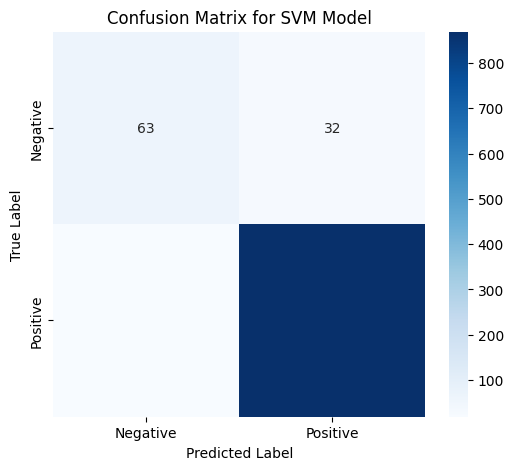

In [16]:
# Compute Confusion Matrix for SVM Model(best model)
cm_svm1 = confusion_matrix(y_test, y_pred_svm)  

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.savefig("confusion1.jpg")
plt.show()


In [17]:
from sklearn.naive_bayes import MultinomialNB

# NB Pipeline
nb_pipe = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("nb", MultinomialNB())
])

# NB Hyperparameters
nb_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.5, 1.0, 1.5],  # Smoothing parameter
}

# Grid Search
nb_clf = GridSearchCV(nb_pipe, nb_params, cv=5)
nb_clf.fit(X_train, y_train)

# Evaluate
y_pred_nb = nb_clf.predict(X_test)
print("Naïve Bayes Results:")
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
nb_pipe = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("cnb", ComplementNB())
])

nb_params = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'cnb__alpha': [0.1, 0.5, 1.0],
}

nb_clf = GridSearchCV(nb_pipe, nb_params, cv=5)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

print("Complement Naïve Bayes Results:")
print(classification_report(y_test, y_pred))


Complement Naïve Bayes Results:
              precision    recall  f1-score   support

           0       0.75      0.44      0.56        95
           1       0.94      0.98      0.96       888

    accuracy                           0.93       983
   macro avg       0.85      0.71      0.76       983
weighted avg       0.92      0.93      0.92       983



## LSTM Model

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["cleaned_review"])
X_seq = tokenizer.texts_to_sequences(df["cleaned_review"])
X_pad = pad_sequences(X_seq, maxlen=200)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define LSTM Model
model_lstm = Sequential([
    Embedding(5000, 100, input_length=200),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation="sigmoid")
])

# Compile Model
model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


C:\Users\mahna\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.8965 - loss: 0.3924 - val_accuracy: 0.9034 - val_loss: 0.2549
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.9222 - loss: 0.2196 - val_accuracy: 0.9217 - val_loss: 0.2093
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - accuracy: 0.9486 - loss: 0.1482 - val_accuracy: 0.9237 - val_loss: 0.2155
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 200ms/step - accuracy: 0.9686 - loss: 0.0966 - val_accuracy: 0.9268 - val_loss: 0.2161
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 214ms/step - accuracy: 0.9755 - loss: 0.0715 - val_accuracy: 0.9207 - val_loss: 0.2515


In [20]:
# Get predicted probabilities
y_pred_prob = model_lstm.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        95
           1       0.95      0.96      0.96       888

    accuracy                           0.92       983
   macro avg       0.78      0.75      0.76       983
weighted avg       0.92      0.92      0.92       983



In [21]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["cleaned_review"])
X_seq = tokenizer.texts_to_sequences(df["cleaned_review"])
X_pad = pad_sequences(X_seq, maxlen=200)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential([
    Embedding(10000, 100, input_length=200),
    SpatialDropout1D(0.2),
    LSTM(100, return_sequences=True),
    LSTM(64),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])


# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


C:\Users\mahna\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 169ms/step - accuracy: 0.8982 - loss: 0.3589 - val_accuracy: 0.9308 - val_loss: 0.1893
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 239ms/step - accuracy: 0.9387 - loss: 0.1770 - val_accuracy: 0.9329 - val_loss: 0.2065
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 239ms/step - accuracy: 0.9687 - loss: 0.1108 - val_accuracy: 0.9196 - val_loss: 0.2152
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - accuracy: 0.9808 - loss: 0.0603 - val_accuracy: 0.9278 - val_loss: 0.2462
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.9898 - loss: 0.0372 - val_accuracy: 0.9257 - val_loss: 0.3064


In [22]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        95
           1       0.95      0.97      0.96       888

    accuracy                           0.93       983
   macro avg       0.80      0.72      0.76       983
weighted avg       0.92      0.93      0.92       983



In [23]:
from tensorflow.keras.layers import Bidirectional
# Define LSTM Model
model = Sequential([
    Embedding(10000, 100, input_length=200),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation="sigmoid")
])

# Compile Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


C:\Users\mahna\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


123/123 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8959 - loss: 0.3528 - val_accuracy: 0.9145 - val_loss: 0.2410
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.9313 - loss: 0.2010 - val_accuracy: 0.9288 - val_loss: 0.1970
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9591 - loss: 0.1158 - val_accuracy: 0.9329 - val_loss: 0.2529
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9661 - loss: 0.1101 - val_accuracy: 0.9207 - val_loss: 0.2856
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.9782 - loss: 0.0628 - val_accuracy: 0.9257 - val_loss: 0.2518


In [24]:
# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        95
           1       0.95      0.97      0.96       888

    accuracy                           0.93       983
   macro avg       0.80      0.75      0.77       983
weighted avg       0.92      0.93      0.92       983



In [25]:
from collections import Counter

nlp = spacy.load("en_core_web_sm")
# Increase the limit (2 million characters)
nlp.max_length = 2_000_000  

# Combine all reviews
all_text = " ".join(df["reviewText"].dropna().astype(str))

# Process the text
doc = nlp(all_text)

# Extract lemmatized tokens (alphabetic and not stopwords)
tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count word frequency
word_freq = Counter(tokens)

# Show top 20 most frequent words
print(word_freq.most_common(20))


[('card', 5604), ('work', 2790), ('phone', 1957), ('gb', 1703), ('great', 1480), ('buy', 1414), ('memory', 1385), ('sandisk', 1328), ('sd', 1239), ('fast', 1200), ('use', 1155), ('good', 1088), ('galaxy', 1023), ('price', 961), ('speed', 952), ('problem', 864), ('samsung', 840), ('storage', 773), ('tablet', 758), ('video', 743)]


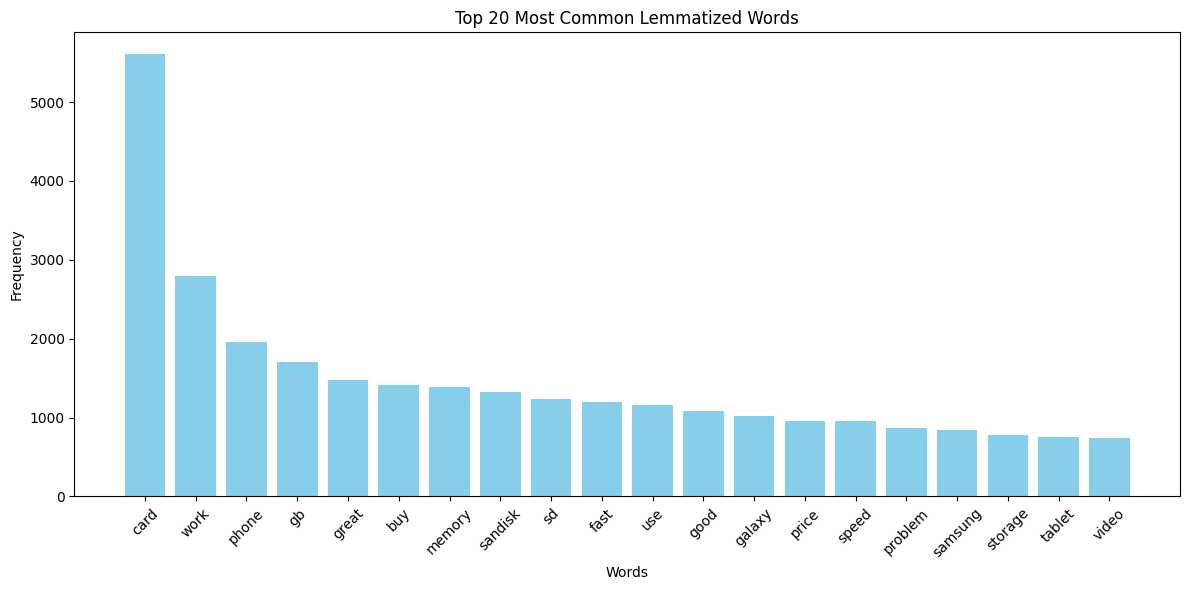

In [26]:
common_words = word_freq.most_common(20)

# Separate words and counts for plotting
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Lemmatized Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("mostcommon.jpg")
plt.show()


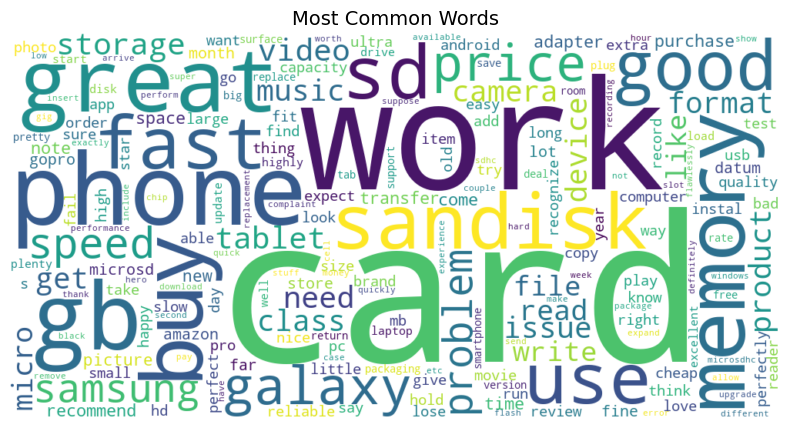

In [27]:
# Generate the word cloud from frequencies
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words", fontsize=14)
plt.savefig("most_common.jpg")
plt.show()


## Bert Tiny model

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel

# Load bert-tiny tokenizer and model
model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Function to extract BERT embeddings
def extract_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, max_length=200, return_tensors="pt")
    with torch.no_grad():
        output = bert_model(**tokens)
        # Mean pooling over token embeddings
    return output.last_hidden_state.mean(dim=1)  

df["cleaned_review"] = df["reviewText"].astype(str).apply(lambda x: extract_bert_embeddings(x))

# Convert embeddings to tensor format
X_bert = torch.stack(df["cleaned_review"].tolist()).squeeze(1)  
# Convert labels
y = torch.tensor(df["overall"].apply(lambda x: 1 if x > 3 else 0).values, dtype=torch.float32)  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)  



C:\Users\mahna\anaconda3\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


X_train shape: torch.Size([3932, 128])
X_test shape: torch.Size([983, 128])


In [29]:
# Define PyTorch sentiment classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  

    def forward(self, x):
        x = self.fc(x)
        # sigmoid for binary classification
        return torch.sigmoid(x)  


# Get embedding dimension
input_dim = X_train.shape[1]  
model_tiny = SentimentClassifier(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_tiny.parameters(), lr=0.01)

# Train Model
num_epochs = 5
for epoch in range(num_epochs):
    model_tiny.train()
    optimizer.zero_grad()
    outputs = model_tiny(X_train).squeeze()
    loss = criterion(outputs, y_train) 
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/5, Loss: 0.7321194410324097
Epoch 2/5, Loss: 0.46740710735321045
Epoch 3/5, Loss: 0.34721389412879944
Epoch 4/5, Loss: 0.3149280548095703
Epoch 5/5, Loss: 0.3211425542831421


In [30]:
# Evaluate Model
model_tiny.eval()
with torch.no_grad():
    y_pred = model_tiny(X_test).squeeze()
    y_pred = (y_pred > 0.5).int()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Define PyTorch sentiment classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  

    def forward(self, x):
        x = self.fc(x)
        # sigmoid for binary classification
        return torch.sigmoid(x)  

# Initialize model

input_dim = X_train.shape[1]  
model_tiny = SentimentClassifier(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model_tiny.parameters(), lr=0.01, momentum=0.9)

# Train Model
num_epochs = 5
for epoch in range(num_epochs):
    model_tiny.train()
    optimizer.zero_grad()
    outputs = model_tiny(X_train).squeeze()
    loss = criterion(outputs, y_train)  
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch 1/5, Loss: 0.382994145154953
Epoch 2/5, Loss: 0.3651770353317261
Epoch 3/5, Loss: 0.3403892517089844
Epoch 4/5, Loss: 0.31956714391708374
Epoch 5/5, Loss: 0.30788230895996094


In [32]:
# Evaluate Model
model_tiny.eval()
with torch.no_grad():
    y_pred = model_tiny(X_test).squeeze()
    y_pred = (y_pred > 0.5).int()

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Distilbert-base-uncased model

In [33]:
# Choose BERT model
model_name = "distilbert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model = bert_model.to(device)
bert_model.eval()
# Function to extract BERT embeddings using [CLS] token
def extract_bert_embeddings(text):
    tokens = tokenizer(text, padding=True, truncation=True, max_length=200, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = bert_model(**tokens)

    if "distilbert" in model_name:
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # DistilBERT CLS
    else:
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # BERT CLS 
    
    return cls_embedding.squeeze(0).cpu()

# Apply embedding extraction to text
df["cleaned_review"] = df["reviewText"].astype(str).apply(lambda x: extract_bert_embeddings(x))

# Stack embeddings
X_bert = torch.stack(df["cleaned_review"].tolist())
y = torch.tensor(df["overall"].apply(lambda x: 1 if x > 3 else 0).values, dtype=torch.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: torch.Size([3932, 768])
X_test shape: torch.Size([983, 768])


In [34]:
# Define PyTorch sentiment classifier
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1) 

    def forward(self, x):
        x = self.fc(x)
        return torch.sigmoid(x)

# Initialize model
input_dim = X_train.shape[1]  
model = SentimentClassifier(input_dim).to(device)

# Move data to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)  

# Train Model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train).squeeze()             
    loss = criterion(outputs, y_train)            
    
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 0.7506
Epoch 2/5, Loss: 0.6844
Epoch 3/5, Loss: 0.6248
Epoch 4/5, Loss: 0.5717
Epoch 5/5, Loss: 0.5250


In [35]:
# Put model in evaluation mode
model.eval()

# Disable gradient calculations
with torch.no_grad():
    outputs = model(X_test).squeeze()  
    # Convert to binary labels
    predictions = (outputs > 0.5).int()            

# Move data back to CPU for sklearn
y_true = y_test.cpu().numpy()
y_pred = predictions.cpu().numpy()

# Print evaluation metrics
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        95
         1.0       0.90      1.00      0.95       888

    accuracy                           0.90       983
   macro avg       0.45      0.50      0.47       983
weighted avg       0.82      0.90      0.86       983



C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
